In [522]:
#라이브러리 불러오기
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [524]:
#데이터 불러오기
df = pd.read_csv("cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [526]:
#데이터 구조 확인
df.info()
df['Level'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

C:\Users\jhm43\AppData\Local\Temp\ipykernel_22756\4245170338.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Level', data=df_processed, palette='pastel', hue=None, legend=False)


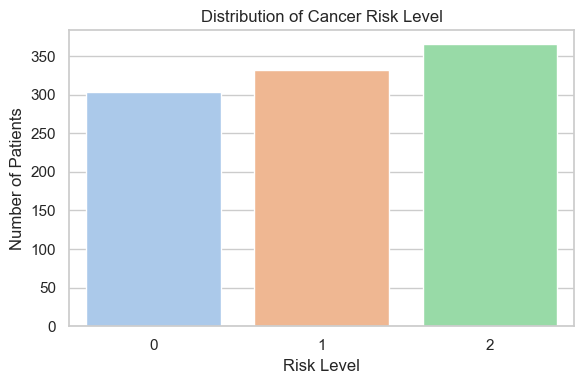

In [530]:
# 스타일 설정
sns.set(style='whitegrid')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 📊 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Level', data=df_processed, palette='pastel', hue=None, legend=False)

plt.title('Distribution of Cancer Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

In [500]:
# 2. 결측치 확인
print("결측치 개수 확인:")
print(df.isnull().sum())

결측치 개수 확인:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [502]:
#컬럼명 공백 제거
df.columns = df.columns.str.strip()

In [504]:
#분석에 불필요한 열 제거
df = df.drop(columns=['index', 'Patient Id'], errors='ignore')
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [506]:
#타겟 변수(Level) 인코딩
#Low → 0, Medium → 1, High → 2
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Level'] = df['Level'].map(level_mapping)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


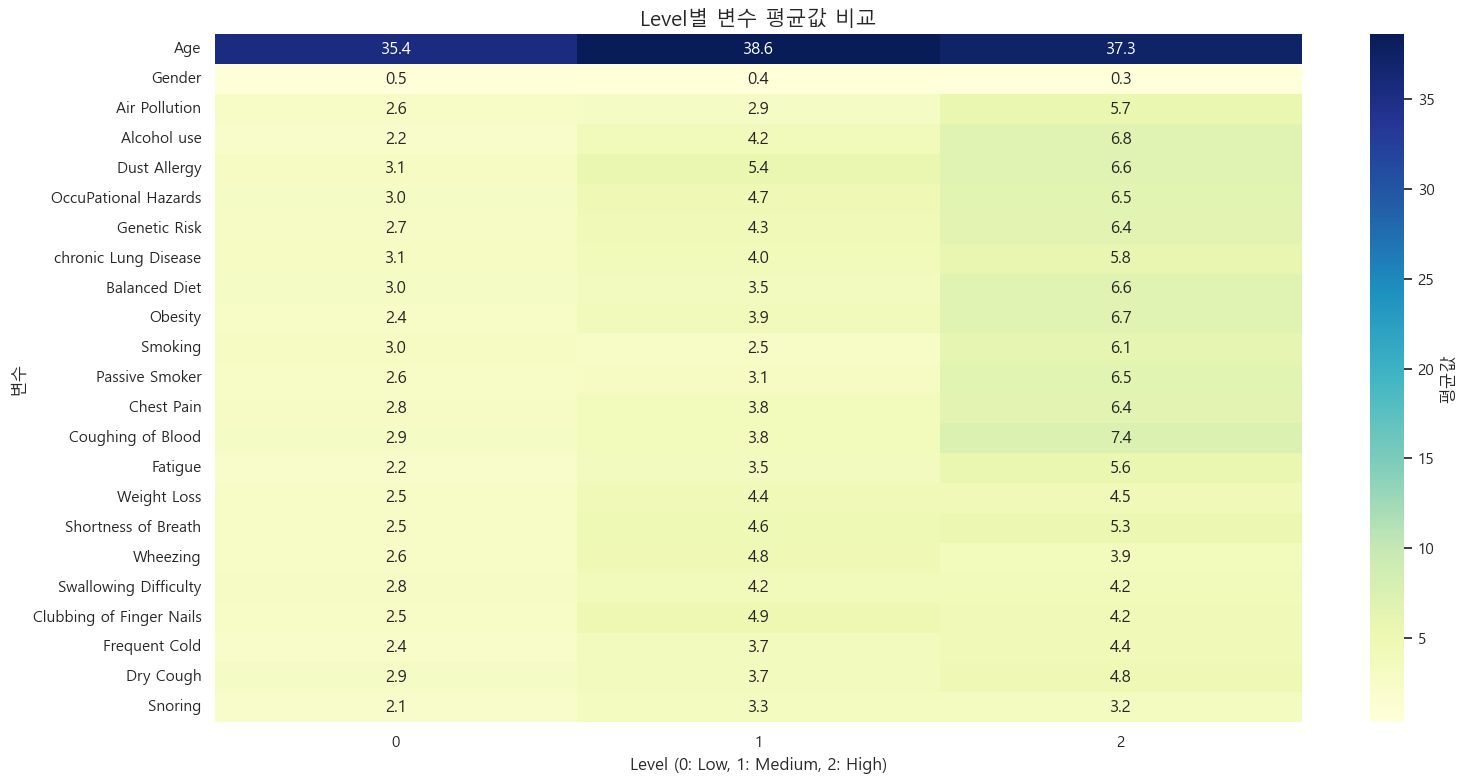

In [532]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# 복사본 생성
df_eda = df_processed.copy()

# 타겟 변수(Level)별 평균값 계산
grouped_means = df_eda.groupby("Level").mean()

# 히트맵 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(grouped_means.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': '평균값'})
plt.title("Level별 변수 평균값 비교", fontsize=15)
plt.xlabel("Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("변수")
plt.tight_layout()
plt.show()

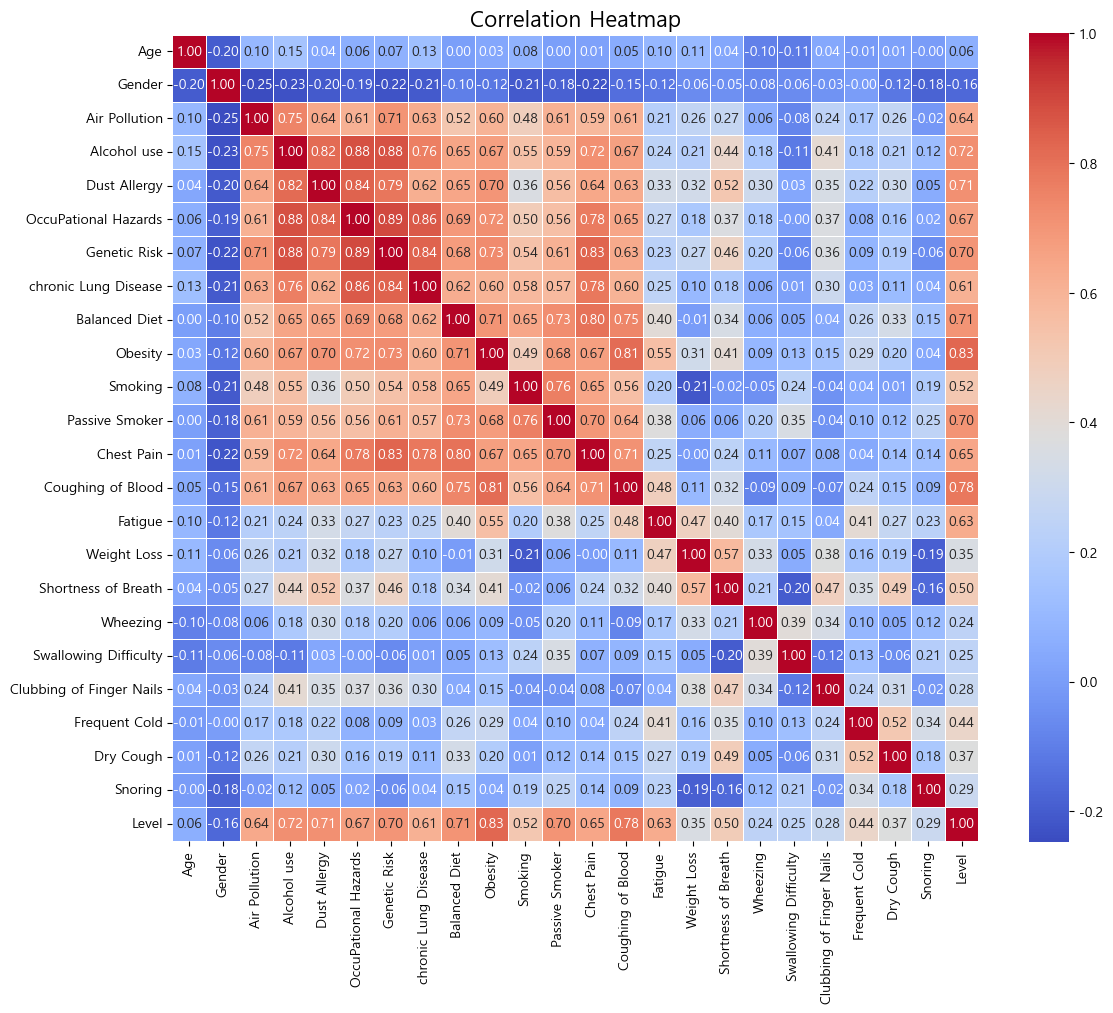

In [247]:
# 상관계수 계산
corr_matrix = df_processed.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        # 셀 안에 숫자 표시
            fmt=".2f",         # 소수점 2자리
            cmap="coolwarm",   # 컬러맵
            square=True,       # 정사각형 셀
            linewidths=0.5,    # 셀 사이 경계선
            cbar=True)         # 컬러바 표시

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [250]:
# Level과 다른 변수들과의 상관계수만 추출
level_corr = df_processed.corr()['Level'].drop('Level')

# 상관계수 기준으로 내림차순 정렬
level_corr_sorted = level_corr.sort_values(ascending=False)

# 결과 출력
level_corr_sorted

Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level, dtype: float64

In [304]:
#선택한 주요 변수 리스트 (Level과 상관 높은 순서)
selected_features = [
     'Obesity',
    'Coughing of Blood',
    'Alcohol use',
    'Dust Allergy',
    'Balanced Diet',
    'Passive Smoker',
    'Genetic Risk',
    'OccuPational Hazards',
    'Chest Pain',
    'Air Pollution'
]

In [306]:
X_train.shape

(800, 8)

In [308]:
 X_test.shape

(200, 8)

In [310]:
y_train.value_counts()

Level
2    292
1    266
0    242
Name: count, dtype: int64

In [312]:
y_test.value_counts()

Level
2    73
1    66
0    61
Name: count, dtype: int64

In [534]:
#모델 생성 및 학습
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [536]:
#예측
y_pred = model.predict(X_test_scaled)

In [336]:
#정확도
accuracy_score(y_test, y_pred)

0.885

In [348]:
#classification_report를 dict 형태로 추출
report_dict = classification_report(
    y_test, y_pred,
    target_names=['Low', 'Medium', 'High'],
    output_dict=True
)
#DataFrame으로 변환
report_df = pd.DataFrame(report_dict).T
#평균 행 제거
report_df = report_df.drop(['macro avg', 'weighted avg'], errors='ignore')
#소수점 정리 + 컬럼 순서 맞추기
report_df = report_df[['precision', 'recall', 'f1-score', 'support']].round(3)
#출력
report_df

,precision,recall,f1-score,support
Low,0.812,0.852,0.832,61.000
Medium,0.841,0.803,0.822,66.000
High,0.986,0.986,0.986,73.000
accuracy,0.885,0.885,0.885,0.885


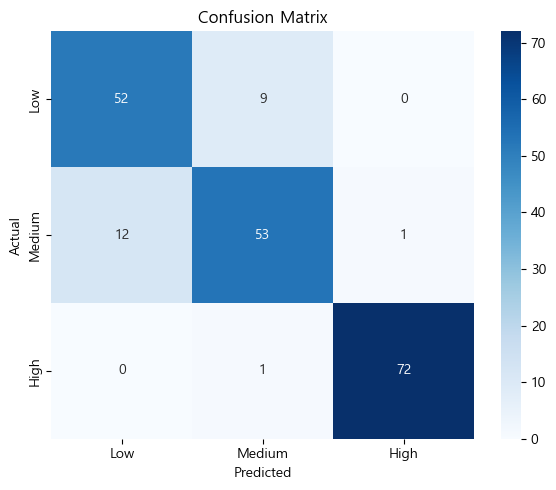

In [270]:
#혼동행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

C:\Users\jhm43\AppData\Local\Temp\ipykernel_22756\2075800086.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Abs_Coefficient', data=coef_df, palette='crest')


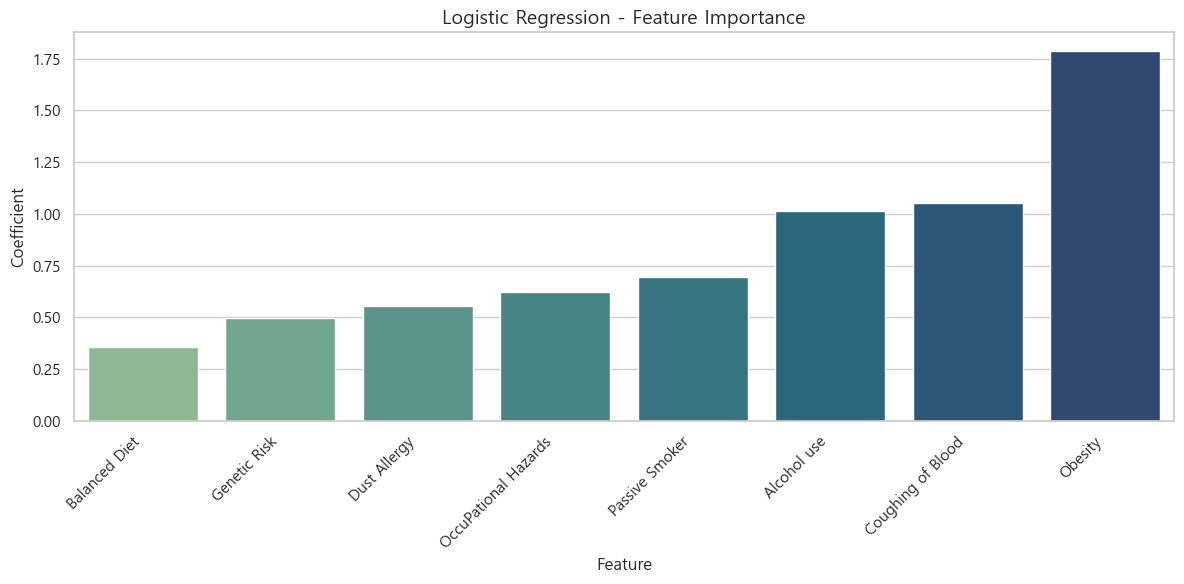

In [548]:
# 모델에서 계수 추출
coefficients = model.coef_[0]  # 다중 클래스의 경우 각 클래스마다 있으므로 [0] 선택
feature_names = X_train.columns

# 데이터프레임 생성
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 절댓값 기준으로 정렬
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=True)

# 시각화
plt.figure(figsize=(12, 6))  # 가로 길이 넉넉하게 확보
sns.barplot(x='Feature', y='Abs_Coefficient', data=coef_df, palette='crest')

plt.title('Logistic Regression - Feature Importance', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)

plt.xticks(rotation=45, ha='right')  # x축 라벨 기울여서 겹침 방지
plt.tight_layout()
plt.show()